## Air Quality Analysis and Prediction  

### Being an enthusiast in Machine Learning  i pledge that i will put my own effort and learning skills to acheive better results 

In [1]:
# Importing required libraries for Capstone project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#checking dataset
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


#### Here we know that  S02, N02, Rspm ,Spm ,pm2_5  plays major role in building prediction model 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

### Furthur Investigation for more information 

In [6]:
data.count().isnull()

stn_code                       False
sampling_date                  False
state                          False
location                       False
agency                         False
type                           False
so2                            False
no2                            False
rspm                           False
spm                            False
location_monitoring_station    False
pm2_5                          False
date                           False
dtype: bool

#### No Null-values found in any coloumns 

In [11]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [12]:
total = data.isnull().sum().sort_values(ascending=False)
total.head()

pm2_5       426428
spm         237387
agency      149481
stn_code    144077
rspm         40222
dtype: int64

### Its showing that Pm2_5 has lot of missing values  

In [13]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692


## Missing value percentage vizualisation 

Text(0.5, 1.0, 'Percent missing data by feature')

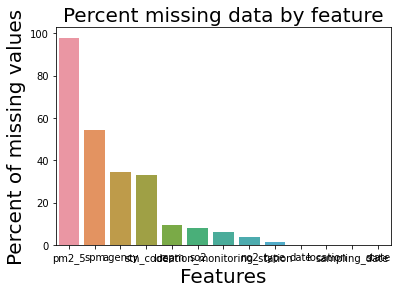

In [14]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [15]:
grp_state = data.groupby('state')

In [16]:
#Fuction to fill mean values in coloumns 
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [17]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)

In [18]:
data['rspm'].isnull().sum()

3

In [19]:
data['so2']=grp_state['so2'].transform(impute_mean_by_state)

In [20]:
data['so2'].isnull().sum()

3

In [21]:
data['spm']=grp_state['spm'].transform(impute_mean_by_state)

In [22]:
data['spm'].isnull().sum()

4071

In [23]:
data['no2']=grp_state['no2'].transform(impute_mean_by_state)

In [24]:
data['no2'].isnull().sum()

3

In [25]:
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 3
no2                                 3
rspm                                3
spm                              4071
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

## Checking Data Distribution 

(array([ 67861., 117849., 161984.,  59854.,  13840.,   5889.,   2214.,
          1075.,    550.,    312.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

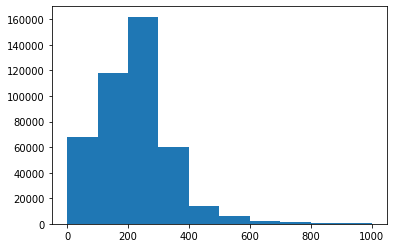

In [26]:
plt.hist(data.spm,range=(0.0,1000))

# Exploratory Data Analysis

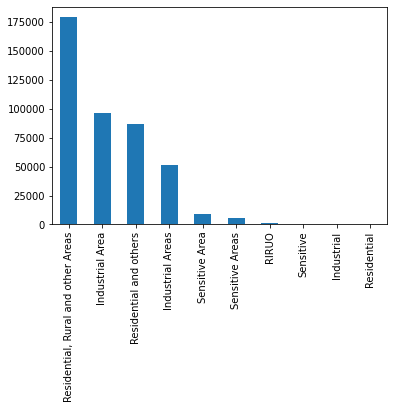

In [27]:
data['type'].value_counts().plot.bar(); 

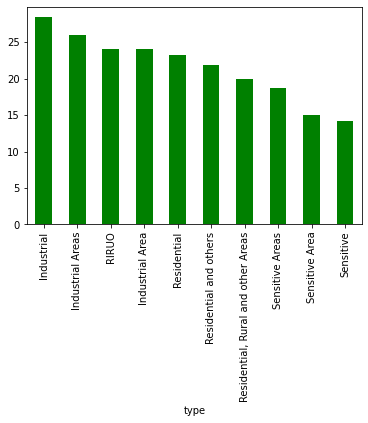

In [28]:
df_group_by_type_no2=data.groupby([data['type']])['no2'].median().sort_values(ascending =False)
df_group_by_type_no2.plot.bar(color='g');

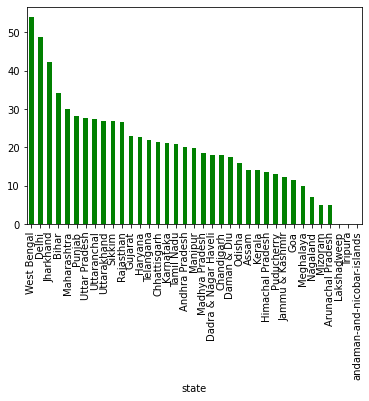

In [29]:
df_group_by_type_no2=data.groupby([data['state']])['no2'].median().sort_values(ascending =False)
df_group_by_type_no2.plot.bar(color='g');

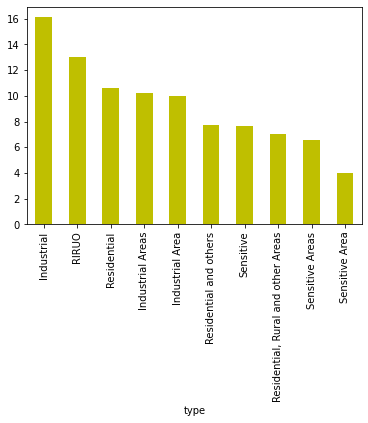

In [30]:
df_group_by_type_so2=data.groupby([data['type']])['so2'].median().sort_values(ascending =False)
df_group_by_type_so2.plot.bar(color='y');

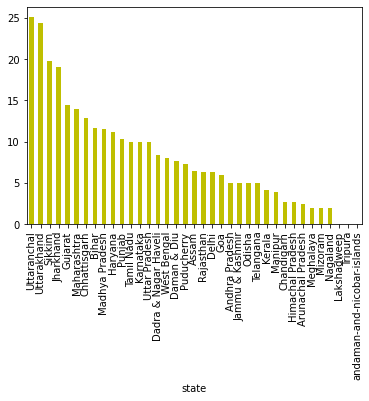

In [31]:
df_group_by_type_so2=data.groupby([data['state']])['so2'].median().sort_values(ascending =False)
df_group_by_type_so2.plot.bar(color='y');

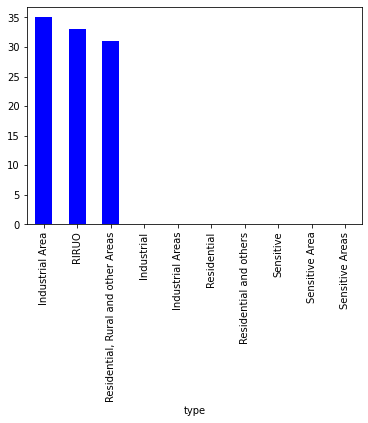

In [32]:
df_group_by_type_pm2_5=data.groupby([data['type']])['pm2_5'].median().sort_values(ascending =False)
df_group_by_type_pm2_5.plot.bar(color='b');

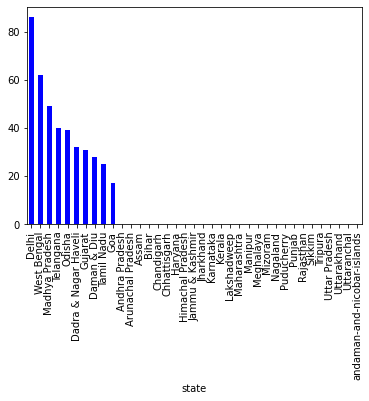

In [33]:
df_group_by_type_pm2_5=data.groupby([data['state']])['pm2_5'].median().sort_values(ascending =False)
df_group_by_type_pm2_5.plot.bar(color='b');

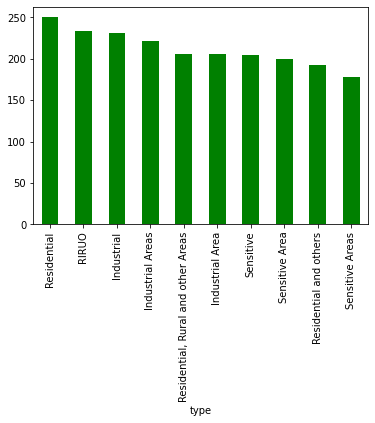

In [34]:
df_group_by_type_spm=data.groupby([data['type']])['spm'].median().sort_values(ascending =False)
df_group_by_type_spm.plot.bar(color='g');

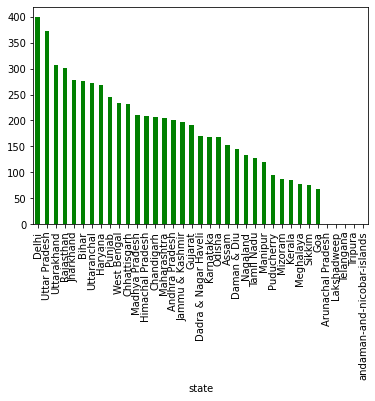

In [35]:
df_group_by_type_spm=data.groupby([data['state']])['spm'].median().sort_values(ascending =False)
df_group_by_type_spm.plot.bar(color='g');

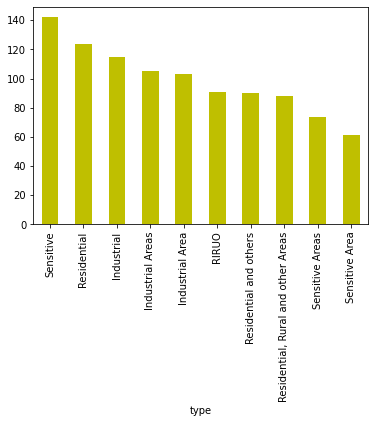

In [36]:
df_group_by_type_rspm=data.groupby([data['type']])['rspm'].median().sort_values(ascending =False)
df_group_by_type_rspm.plot.bar(color='y');

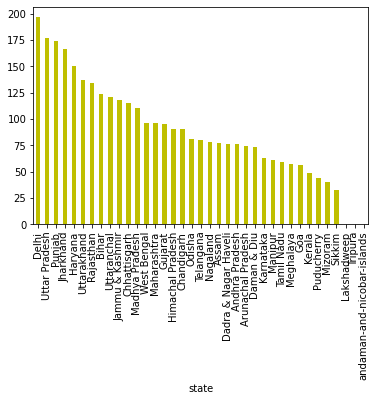

In [37]:
df_group_by_type_rspm=data.groupby([data['state']])['rspm'].median().sort_values(ascending =False)
df_group_by_type_rspm.plot.bar(color='y');

### Checking corlation between no2,so2,spm,rspm,pm2_5 

In [38]:
data['pm2_5'].corr(data['so2'])

0.03910191408042048

In [39]:
data['pm2_5'].corr(data['no2'])

0.5067594943035275

In [40]:
data['pm2_5'].corr(data['rspm'])

0.7517797773409345

In [41]:
data['so2'].corr(data['no2'])

0.3464294326259207

In [42]:
data['so2'].corr(data['spm'])

0.14268864180655802

In [43]:
data['so2'].corr(data['rspm'])

0.16041725053461295

In [44]:
data['no2'].corr(data['spm'])

0.326767192683816

In [45]:
data['no2'].corr(data['rspm'])

0.35218863211379375

## CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA¶

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used$$\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}$$

In [46]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


## CALCULATE AIR QUALITY INDEX FOR no2 BASED ON FORMULA 

In [47]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


## CALCULATE AIR QUALITY INDEX FOR rspm BASED ON FORMULA

In [48]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


## CALCULATE AIR QUALITY INDEX FOR Spm BASED ON FORMULA

In [49]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


## CALCULATE AIR QUALITY INDEX FOR pm2_5 BASED ON FORMULA

In [50]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()

,pm2_5,PMi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


## Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI.If multiple pollutants are measured at a monitoring site, then the largest or "dominant" AQI value is reported for the location¶
 

In [51]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


## AQI Range according to AQI 

In [52]:
def AQI_Range(x):
    if x<=50:
        return 0
    elif x>50 and x<=100:
        return 1
    elif x>100 and x<=200:
        return 2
    elif x>200 and x<=300:
        return 3
    elif x>300 and x<=400:
        return 4
    elif x>400:
        return 5

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252,2
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252,2
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252,2
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252,2
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252,2


##  Remove Rows with Null Values

In [53]:
data=data.dropna(subset=['spm'])

In [54]:
data=data.dropna(subset=['rspm'])

In [55]:
data=data.dropna(subset=['so2'])

In [56]:
data=data.dropna(subset=['no2'])

In [57]:
data.isna().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                             5390
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27488
pm2_5                          422711
date                                4
SOi                                 0
Noi                                 0
RSPMi                               0
SPMi                                0
PMi                            422711
AQI                                 0
AQI_Range                           0
dtype: int64

## Building a ML Model 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = data[['SOi','Noi','RSPMi','SPMi','AQI']]
y = data['AQI_Range']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

## 1) Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression()

In [63]:
print('Coefficients',LR.coef_)

Coefficients [ 1.06505228e-03 -8.17153323e-04 -2.82685949e-05  1.31181345e-03
  9.49401245e-03]


In [64]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'AQI ')

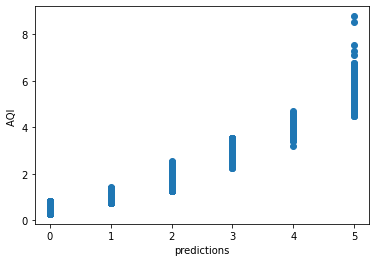

In [65]:
plt.scatter(y_test,predictions)
plt.xlabel('predictions')
plt.ylabel('AQI ')

In [66]:
LR.score(X_test,y_test)

0.9225895516448172

In [67]:
LR.predict([[4,21,78,100,103]])

array([1.3744145])

In [68]:
LR.predict([[5.2,7.625,76.53,75.0,78.50]])

array([1.1212649])

In [69]:
LR.predict([[7.750,35.625,78.182824,166.84,166.84]])

array([2.06023178])

In [70]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:0.92 
MSE:0.28 


## 2) Support vector Regression 

In [71]:
from sklearn.svm import SVR

In [72]:
svr = SVR(kernel='linear')

In [ ]:
svr.fit(X_train, y_train)  